In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.tree import export_text
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# import df containing within45cone metric

withincone = pd.read_csv('mito_above_soma_within45cone.csv', index_col=[0])

#drop boolean column
withincone = withincone.drop(['within_cone_theta45bool'], axis=1)
withincone

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,cellid_str,centroid_y-ctr_y,dist_to_soma_thresh_1500,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,pyramidal,pyramidal cell,4778.608166,-648,-452,-238,825.137564,648518346349523993,False,False,0,0,4322,1476,1406,4544.944444,-1476.0,0
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,pyramidal,pyramidal cell,4534.032201,-2290,-956,-687,2574.879609,648518346349523993,False,False,0,0,4222,1310,1008,4340.662161,-1310.0,0
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,pyramidal,pyramidal cell,10174.394134,-340,-300,-11,453.564769,648518346349523993,False,False,0,0,8514,5524,718,8544.221439,-5524.0,0
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,pyramidal,pyramidal cell,1220.157777,-62,-46,-2,77.226938,648518346349523993,False,True,0,1,-1126,470,-3,1126.003996,-470.0,0
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,pyramidal,pyramidal cell,3029.110100,-782,-410,-65,885.352472,648518346349523993,False,False,0,0,-158,2712,1340,1349.282772,-2712.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210970,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,pyramidal,pyramidal cell,1314.834210,-484,-372,-62,613.582920,648518346349492130,False,True,0,1,-334,1268,97,347.800230,-1268.0,0
210971,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,pyramidal,pyramidal cell,23022.738173,-900,-1576,-56,1815.740070,648518346349492130,False,False,0,0,11230,20098,-63,11230.176713,-20098.0,0
210972,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,pyramidal,pyramidal cell,10363.949247,-322,-724,-95,798.050750,648518346349492130,False,False,0,0,-204,10328,-838,862.473188,-10328.0,0
210973,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130,288416,158520,76320,5.980140,20.961437,Somatic,72944,35952,2038,pyramidal,pyramidal cell,3774.941589,-172,-1276,-114,1292.577270,648518346349492130,False,False,0,0,-840,3678,-130,850.000000,-3678.0,0


In [5]:
# add mito-to-mito stats; drop rows beyond column 11

mm_dist_stats = pd.read_csv('../mito_to_mito_distance_statistics/compiled_mito_to_mito_distance_stats_nocellid.csv', index_col=[0])
mm_dist_stats = mm_dist_stats.drop(mm_dist_stats.columns[11:], axis=1)
mm_dist_stats

,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,mito_id
0,196.0,7493.879886,5358.067644,0.0,4229.199053,5547.331920,9169.323781,26461.627614,4.877342,2.025797,1783325
1,196.0,7403.495975,5418.682808,0.0,4052.491869,5378.002393,9101.405330,26497.305071,4.935129,2.044597,1780086
2,196.0,10724.406356,4860.556101,0.0,8462.439730,10156.453365,11852.577621,27373.207485,2.589345,1.296582,2026719
3,196.0,6237.536731,6097.146769,0.0,1940.415856,4356.927020,8496.087586,28787.191892,5.617236,2.248441,1540216
4,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513,1547760
...,...,...,...,...,...,...,...,...,...,...,...
204,209.0,7130.690469,7336.003350,0.0,994.276119,4303.812844,12012.871930,31113.030132,4.364447,1.981548,1649818
205,209.0,21084.467285,6155.821683,0.0,20184.581269,21733.447403,23581.761872,36894.681405,-0.833545,0.013475,2397704
206,209.0,9532.196738,4332.100257,0.0,8150.885903,9234.419310,10328.859376,24579.066398,2.620475,1.290201,1667802
207,209.0,7038.485608,6170.602395,0.0,2679.756705,3817.004061,10301.231431,29525.049179,5.046709,2.128451,1654227


In [6]:
# by merging, this df will only have pyr neurons

withincone_mm_dist_stats = pd.merge(withincone, mm_dist_stats, on='mito_id', how='inner')
withincone_mm_dist_stats

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,cell_type,cell_subtype,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,cellid_str,centroid_y-ctr_y,dist_to_soma_thresh_1500,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,pyramidal,pyramidal cell,4778.608166,-648,-452,-238,825.137564,648518346349523993,False,False,0,0,4322,1476,1406,4544.944444,-1476.0,0,196.0,7493.879886,5358.067644,0.0,4229.199053,5547.331920,9169.323781,26461.627614,4.877342,2.025797
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,pyramidal,pyramidal cell,4534.032201,-2290,-956,-687,2574.879609,648518346349523993,False,False,0,0,4222,1310,1008,4340.662161,-1310.0,0,196.0,7403.495975,5418.682808,0.0,4052.491869,5378.002393,9101.405330,26497.305071,4.935129,2.044597
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,pyramidal,pyramidal cell,10174.394134,-340,-300,-11,453.564769,648518346349523993,False,False,0,0,8514,5524,718,8544.221439,-5524.0,0,196.0,10724.406356,4860.556101,0.0,8462.439730,10156.453365,11852.577621,27373.207485,2.589345,1.296582
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,pyramidal,pyramidal cell,1220.157777,-62,-46,-2,77.226938,648518346349523993,False,True,0,1,-1126,470,-3,1126.003996,-470.0,0,196.0,6237.536731,6097.146769,0.0,1940.415856,4356.927020,8496.087586,28787.191892,5.617236,2.248441
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,pyramidal,pyramidal cell,3029.110100,-782,-410,-65,885.352472,648518346349523993,False,False,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183658,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,pyramidal,pyramidal cell,1314.834210,-484,-372,-62,613.582920,648518346349492130,False,True,0,1,-334,1268,97,347.800230,-1268.0,0,209.0,7130.690469,7336.003350,0.0,994.276119,4303.812844,12012.871930,31113.030132,4.364447,1.981548
183659,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,pyramidal,pyramidal cell,23022.738173,-900,-1576,-56,1815.740070,648518346349492130,False,False,0,0,11230,20098,-63,11230.176713,-20098.0,0,209.0,21084.467285,6155.821683,0.0,20184.581269,21733.447403,23581.761872,36894.681405,-0.833545,0.013475
183660,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,pyramidal,pyramidal cell,10363.949247,-322,-724,-95,798.050750,648518346349492130,False,False,0,0,-204,10328,-838,862.473188,-10328.0,0,209.0,9532.196738,4332.100257,0.0,8150.885903,9234.419310,10328.859376,24579.066398,2.620475,1.290201
183661,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130

In [7]:
withincone_mm_dist_stats.cell_subtype.value_counts()

pyramidal cell    183663
Name: cell_subtype, dtype: int64

In [8]:
withincone_mm_dist_stats.compartment.value_counts()

Somatic              93616
Basal                54904
Apical               19970
Axonal               12414
Unknown               1622
Unknown dendritic     1137
Name: compartment, dtype: int64

In [9]:
withincone_mm_dist_stats_nostr = withincone_mm_dist_stats.drop(['cell_type', 'cell_subtype', 'cellid_str', 'centroid_y-ctr_y', 'dist_to_soma_thresh_1500'], axis=1)
withincone_mm_dist_stats_nostr

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,4778.608166,-648,-452,-238,825.137564,0,0,4322,1476,1406,4544.944444,-1476.0,0,196.0,7493.879886,5358.067644,0.0,4229.199053,5547.331920,9169.323781,26461.627614,4.877342,2.025797
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,4534.032201,-2290,-956,-687,2574.879609,0,0,4222,1310,1008,4340.662161,-1310.0,0,196.0,7403.495975,5418.682808,0.0,4052.491869,5378.002393,9101.405330,26497.305071,4.935129,2.044597
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,10174.394134,-340,-300,-11,453.564769,0,0,8514,5524,718,8544.221439,-5524.0,0,196.0,10724.406356,4860.556101,0.0,8462.439730,10156.453365,11852.577621,27373.207485,2.589345,1.296582
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,1220.157777,-62,-46,-2,77.226938,0,1,-1126,470,-3,1126.003996,-470.0,0,196.0,6237.536731,6097.146769,0.0,1940.415856,4356.927020,8496.087586,28787.191892,5.617236,2.248441
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183658,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,1314.834210,-484,-372,-62,613.582920,0,1,-334,1268,97,347.800230,-1268.0,0,209.0,7130.690469,7336.003350,0.0,994.276119,4303.812844,12012.871930,31113.030132,4.364447,1.981548
183659,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,23022.738173,-900,-1576,-56,1815.740070,0,0,11230,20098,-63,11230.176713,-20098.0,0,209.0,21084.467285,6155.821683,0.0,20184.581269,21733.447403,23581.761872,36894.681405,-0.833545,0.013475
183660,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,10363.949247,-322,-724,-95,798.050750,0,0,-204,10328,-838,862.473188,-10328.0,0,209.0,9532.196738,4332.100257,0.0,8150.885903,9234.419310,10328.859376,24579.066398,2.620475,1.290201
183661,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130,288416,158520,76320,5.980140,20.961437,Somatic,72944,35952,2038,3774.941589,-172,-1276,-114,1292.577270,0,0,-840,3678,-130,850.000000,-3678.0,0,209.0,7038.485608,6170.602395,0.0,2679.756705,3817.004061,10301.231431,29525.049179,5.046709,2.128451


In [10]:
# drop rows where compartment = Unknown (this includes all of the inh neurons too)

pyr_five_withincone_mm_dist_stats_nostr = withincone_mm_dist_stats_nostr[withincone_mm_dist_stats_nostr['compartment'] != 'Unknown']
pyr_five_withincone_mm_dist_stats_nostr['compartment'].value_counts()

Somatic              93616
Basal                54904
Apical               19970
Axonal               12414
Unknown dendritic     1137
Name: compartment, dtype: int64

In [11]:
# df with four known compartments
pyr_four_withincone_mm_dist_stats_nostr = pyr_five_withincone_mm_dist_stats_nostr[pyr_five_withincone_mm_dist_stats_nostr['compartment'] != "Unknown dendritic"]
pyr_four_withincone_mm_dist_stats_nostr['compartment'].value_counts()

Somatic    93616
Basal      54904
Apical     19970
Axonal     12414
Name: compartment, dtype: int64

In [12]:
# df with unknown dendritic only
pyr_unkdend_withincone_mm_dist_stats_nostr = pyr_five_withincone_mm_dist_stats_nostr[pyr_five_withincone_mm_dist_stats_nostr['compartment'] == "Unknown dendritic"]
pyr_unkdend_withincone_mm_dist_stats_nostr['compartment'].value_counts()

Unknown dendritic    1137
Name: compartment, dtype: int64

In [13]:
# df with unknown dendritic only
pyr_unk_withincone_mm_dist_stats_nostr = withincone_mm_dist_stats_nostr[withincone_mm_dist_stats_nostr['compartment'] == "Unknown"]
pyr_unk_withincone_mm_dist_stats_nostr['compartment'].value_counts()

Unknown    1622
Name: compartment, dtype: int64

In [14]:
pyr_unk_withincone_mm_dist_stats_nostr

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
297,3191325,767412,100166,57548,234,99640,57242,200,100470,57786,267,648518346349538711,400664,230192,9360,7.544029,17.566330,Unknown,103696,54208,228,4859.684763,-830,-544,-67,994.648179,0,0,-3530,3340,6,3530.005099,-3340.0,0,653.0,8852.249963,6566.390531,0.0,4457.219313,6129.861091,11916.362197,40251.922252,5.892497,2.317551
542,3619521,43256,107044,54324,561,106970,54234,553,107118,54402,568,648518346349538711,428176,217296,22440,0.775085,5.996301,Unknown,103696,54208,228,3366.518825,-148,-168,-15,224.394741,0,0,3348,116,333,3364.519728,-116.0,0,653.0,9073.184446,8249.652684,0.0,3621.041839,5100.846596,12341.960987,44833.246592,6.069375,2.367446
628,3404013,73876,102152,58418,172,102018,58154,165,102312,58676,182,648518346349538711,408608,233672,6880,1.196744,7.567035,Unknown,103696,54208,228,4484.548138,-294,-522,-17,599.340471,0,0,-1544,4210,-56,1545.015210,-4210.0,0,653.0,8947.499664,7108.340143,0.0,4270.863262,5861.502879,12266.870832,42399.848172,5.984628,2.343385
654,3514532,86576,103894,58752,338,103820,58512,327,103962,59018,347,648518346349538711,415576,235008,13520,1.294203,6.968523,Unknown,103696,54208,228,4549.641744,-142,-506,-20,525.927752,0,0,198,4544,110,226.503863,-4544.0,0,653.0,9272.178957,7482.270236,0.0,4232.232626,5845.723993,12178.472154,44057.143586,6.093513,2.367942
933,1796033,519668,74530,51448,2130,73896,51000,2100,75066,51984,2157,648518346349538102,298120,205792,85200,5.195219,12.510876,Unknown,70176,49072,2010,4961.561448,-1170,-984,-57,1529.838227,0,0,4354,2376,120,4355.653338,-2376.0,0,435.0,8153.781442,5467.201606,0.0,4299.218277,5888.096891,10674.179397,27000.929632,4.296374,1.897612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181883,3828189,58704,111978,46112,348,111944,45738,324,112020,46384,380,648518346349537271,447912,184448,13920,1.371401,18.033760,Unknown,110672,48448,63,2691.422858,-76,-646,-56,652.861394,1,0,1306,-2336,285,1336.735202,2336.0,1,249.0,5940.074129,5266.795278,0.0,2141.204568,3497.167568,9332.769578,23317.183192,4.347109,1.968736
182090,3947961,150188,112444,49214,426,112200,48994,404,112654,49460,453,648518346349537271,449776,196856,17040,1.899099,7.316454,Unknown,110672,48448,63,1964.308784,-454,-466,-49,652.436204,0,0,1772,766,363,1808.798773,-766.0,0,249.0,5626.424178,5265.917270,0.0,1730.461210,3006.989857,8347.036420,24228.399947,5.056300,2.134709
182297,1653993,305840,73002,40588,1964,71736,40432,1877,73994,40748,2061,648518346349492197,292008,162352,78560,5.396959,40.493662,Unknown,67920,39584,2148,5183.492645,-2258,-316,-184,2287.416884,0,0,5082,1004,-184,5085.329881,-1004.0,0,190.0,9373.701720,6275.626175,0.0,5319.544419,6810.139287,12430.218957,29636.587202,3.871251,1.773701
182943,3325821,102964,101750,70528,822,101422,70372,791,102066,70640,856,648518346349523030,407000,282112,32880,1.747194,12.122188,Unknown,106144,71360,666,4474.795638,-644,-268,-65,700.560490,1,0,-4394,-832,156,4396.768359,832.0,0,301.0,6357.417719,5077.547640,0.0,3495.743269,4682.313958,6907.806598,37041.193947,6.967169,2.572198


In [15]:
len(pyr_unk_withincone_mm_dist_stats_nostr.cellid.unique())

310

In [15]:
# print(pyr_unk_withincone_mm_dist_stats.cellid.unique())

In [18]:
pyr_two_dend_withincone_mm_dist_stats_nostr = pyr_five_withincone_mm_dist_stats_nostr[(pyr_five_withincone_mm_dist_stats_nostr['compartment'] == "Apical") | (pyr_five_withincone_mm_dist_stats_nostr['compartment'] == "Basal")]
pyr_two_dend_withincone_mm_dist_stats_nostr['compartment'].value_counts()

Basal     54904
Apical    19970
Name: compartment, dtype: int64

In [19]:
pyr_two_dend_withincone_mm_dist_stats_nostr.dtypes

mito_id                                    int64
mito_vx                                    int64
ctr_pos_x_vx                               int64
ctr_pos_y_vx                               int64
ctr_pos_z_vx                               int64
bbox_beg_x_vx                              int64
bbox_beg_y_vx                              int64
bbox_beg_z_vx                              int64
bbox_end_x_vx                              int64
bbox_end_y_vx                              int64
bbox_end_z_vx                              int64
cellid                                     int64
ctr_pos_x_nm                               int64
ctr_pos_y_nm                               int64
ctr_pos_z_nm                               int64
surface_area                             float64
complexityindex                          float64
compartment                               object
centroid_x                                 int64
centroid_y                                 int64
centroid_z          

# RFC

In [20]:
# split test size
testsize = 0.30

# number of estimators
n_est = 100

# random state
random_st = 1

# decision tree classifier conditions
min_sampleaf = 1
min_sampsplit = 2 
min_weightfractionleaf = 0.0

In [21]:
# Test-train-split using above parameters

# use two compartment df generated above

train = pyr_two_dend_withincone_mm_dist_stats_nostr

X = train.drop('compartment',axis=1)
y = train['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=random_st)

## Decision tree

In [22]:
start_time = time.time()

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=min_sampleaf,
            min_samples_split=min_sampsplit, min_weight_fraction_leaf=min_weightfractionleaf,
            random_state=random_st, splitter='best')

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the Decision Tree: {elapsed_time:.3f} seconds")

Elapsed time to compute the Decision Tree: 2.206 seconds


## Dtree confusion matrix and classification report

In [23]:
predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 5146   866]
 [  799 15652]]
              precision    recall  f1-score   support

      Apical       0.87      0.86      0.86      6012
       Basal       0.95      0.95      0.95     16451

    accuracy                           0.93     22463
   macro avg       0.91      0.90      0.91     22463
weighted avg       0.93      0.93      0.93     22463



# Tree visualization

In [24]:
# fixed error with deprecated sklearn.exterals.six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO

In [25]:
featurenames = list(train.columns[1:])
featurenames

['mito_vx',
 'ctr_pos_x_vx',
 'ctr_pos_y_vx',
 'ctr_pos_z_vx',
 'bbox_beg_x_vx',
 'bbox_beg_y_vx',
 'bbox_beg_z_vx',
 'bbox_end_x_vx',
 'bbox_end_y_vx',
 'bbox_end_z_vx',
 'cellid',
 'ctr_pos_x_nm',
 'ctr_pos_y_nm',
 'ctr_pos_z_nm',
 'surface_area',
 'complexityindex',
 'compartment',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'ctr_distance_to_soma',
 'bbox_dir_x',
 'bbox_dir_y',
 'bbox_dir_z',
 'bbox_distance',
 'above_soma',
 'within_threshold_1500',
 'new_ctr_pos_x_vx',
 'new_ctr_pos_y_vx',
 'new_ctr_pos_z_vx',
 'mito_ctr_radius_to_normal_for_theta45',
 'radius_adj_ylength_theta45',
 'within_cone_theta45',
 'count',
 'mean',
 'std',
 'min',
 '25%',
 '50%',
 '75%',
 'max',
 'kurtosis',
 'skew']

In [26]:
# uncomment to run; the visualization is not legible

#dot_data = StringIO()  
#export_graphviz(dtree, out_file=dot_data,feature_names=featurenames,filled=True,rounded=True)

#graph = pydot.graph_from_dot_data(dot_data.getvalue())  
#Image(graph[0].create_png()) 

In [27]:
# from https://scikit-learn.org/stable/modules/tree.html#classification

r = export_text(dtree, feature_names=featurenames)
print(r)


|--- within_cone_theta45 <= 0.50
|   |--- new_ctr_pos_y_vx <= -3379.00
|   |   |--- new_ctr_pos_z_vx <= 300.50
|   |   |   |--- new_ctr_pos_y_vx <= -7609.00
|   |   |   |   |--- mito_ctr_radius_to_normal_for_theta45 <= 16192.42
|   |   |   |   |   |--- bbox_dir_y <= -1733.00
|   |   |   |   |   |   |--- bbox_dir_x <= -4591.00
|   |   |   |   |   |   |   |--- bbox_dir_y <= -4673.00
|   |   |   |   |   |   |   |   |--- cellid <= 1664.00
|   |   |   |   |   |   |   |   |   |--- ctr_pos_y_nm <= 390816.00
|   |   |   |   |   |   |   |   |   |   |--- class: Basal
|   |   |   |   |   |   |   |   |   |--- ctr_pos_y_nm >  390816.00
|   |   |   |   |   |   |   |   |   |   |--- class: Apical
|   |   |   |   |   |   |   |   |--- cellid >  1664.00
|   |   |   |   |   |   |   |   |   |--- std <= 7587.52
|   |   |   |   |   |   |   |   |   |   |--- class: Apical
|   |   |   |   |   |   |   |   |   |--- std >  7587.52
|   |   |   |   |   |   |   |   |   |   |--- class: Basal
|   |   |   |   |   |   | 

## Random forest using random state 1

In [28]:
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=n_est, random_state=random_st)
rfc.fit(X_train, y_train)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the Random Forest Classifer: {elapsed_time:.3f} seconds")

Elapsed time to compute the Random Forest Classifer: 18.612 seconds


## Rf confusion matrix and classification report

In [29]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 5252   760]
 [  304 16147]]
              precision    recall  f1-score   support

      Apical       0.95      0.87      0.91      6012
       Basal       0.96      0.98      0.97     16451

    accuracy                           0.95     22463
   macro avg       0.95      0.93      0.94     22463
weighted avg       0.95      0.95      0.95     22463



# Heat map visualization of classification accuracy

## things to check
- line 2 of matrix in next cell; is the correct way to calculate, or should use f1 score directly

In [30]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# coding help from https://www.appsloveworld.com/pandas/100/31/python-remove-brackets-from-arrays
cm = confusion_matrix(y_test,rfc_pred)
coef = np.array(cm).ravel()
# coef

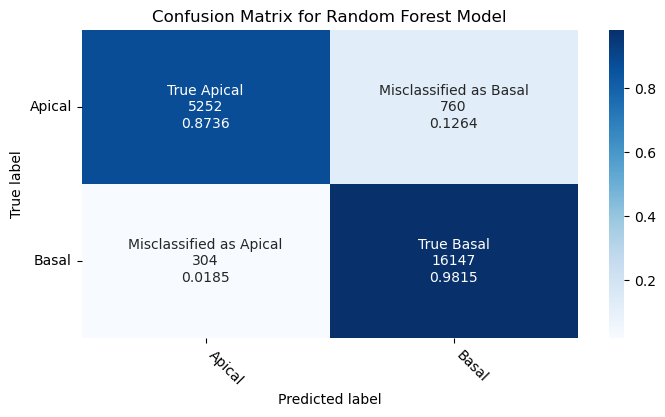

In [31]:
group_names = ['True Apical','Misclassified as Basal','Misclassified as Apical','True Basal']
group_counts = ["{0:0.0f}".format(value) for value in
                coef.flatten()]
group_percentages = ["{0:.4f}".format(value) for value in
                     matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')

# Add labels to the plot
class_names = ['Apical','Basal']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45, ha='left')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

# Feature importance
Source: [scikit-learn](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py)

## based on mean decrease in impurity

In [33]:
X_colnames = [str(X.columns[i]) for i in range(X.shape[1])]

In [34]:
# from https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

start_time = time.time()
feature_names = X_colnames
forest = RandomForestClassifier(random_state=random_st)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 18.593 seconds


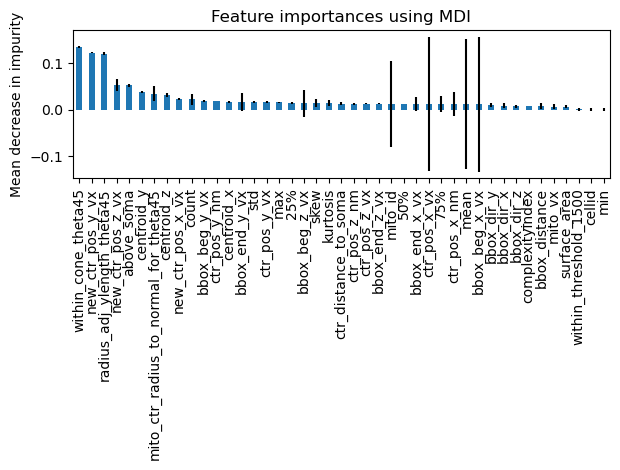

In [35]:
forest_importances = pd.Series(importances, index=feature_names)

# create pareto bar chart
forest_importances_pareto = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_pareto.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## based on feature permutation

In [36]:
start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=random_st, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances_perm = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 80.953 seconds


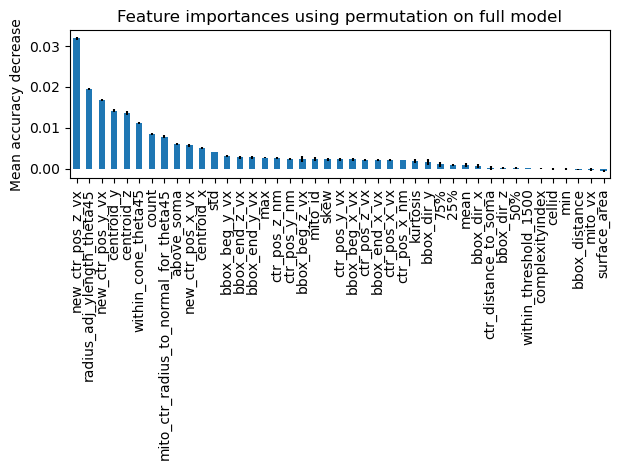

In [37]:
forest_importances_perm_pareto = forest_importances_perm.sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances_perm_pareto.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## Run the prediction on the unknown dendritic df

In [38]:
# pull the unknown dendritic df from above
unknown_dendritic = pyr_unkdend_withincone_mm_dist_stats_nostr
unknown_dendritic

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
11,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,Unknown dendritic,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,3660,-702,960,3783.807606,702.0,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686
12,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,Unknown dendritic,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,534,1592,1115,1236.277073,-1592.0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830
15,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,Unknown dendritic,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,94,3020,1867,1869.364865,-3020.0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350
21,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,Unknown dendritic,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,68,10,842,844.741381,-10.0,0,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182307,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,Unknown dendritic,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,-16114,5628,-526,16122.582672,-5628.0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689
182312,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,Unknown dendritic,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,-13836,-932,-984,13870.946327,932.0,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764
182313,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,Unknown dendritic,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,-5332,2574,-1638,5577.926855,-2574.0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254
182316,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,Unknown dendritic,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,-1596,1902,-816,1792.504393,-1902.0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600


In [41]:
unknown_dendritic_drop = unknown_dendritic.drop(['compartment'], axis=1)
unknown_dendritic_drop

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
11,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,3660,-702,960,3783.807606,702.0,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686
12,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,534,1592,1115,1236.277073,-1592.0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830
15,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,94,3020,1867,1869.364865,-3020.0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350
21,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,68,10,842,844.741381,-10.0,0,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182307,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,-16114,5628,-526,16122.582672,-5628.0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689
182312,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,-13836,-932,-984,13870.946327,932.0,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764
182313,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,-5332,2574,-1638,5577.926855,-2574.0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254
182316,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,-1596,1902,-816,1792.504393,-1902.0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600


In [43]:
unknown_dendritic_drop.dtypes

mito_id                                    int64
mito_vx                                    int64
ctr_pos_x_vx                               int64
ctr_pos_y_vx                               int64
ctr_pos_z_vx                               int64
bbox_beg_x_vx                              int64
bbox_beg_y_vx                              int64
bbox_beg_z_vx                              int64
bbox_end_x_vx                              int64
bbox_end_y_vx                              int64
bbox_end_z_vx                              int64
cellid                                     int64
ctr_pos_x_nm                               int64
ctr_pos_y_nm                               int64
ctr_pos_z_nm                               int64
surface_area                             float64
complexityindex                          float64
centroid_x                                 int64
centroid_y                                 int64
centroid_z                                 int64
ctr_distance_to_soma

In [44]:
rfc_pred_unknowndendritic = rfc.predict(unknown_dendritic_drop)
rfc_pred_unknowndendritic

array(['Basal', 'Basal', 'Basal', ..., 'Basal', 'Basal', 'Basal'],
      dtype=object)

In [46]:
type(rfc_pred_unknowndendritic)

numpy.ndarray

In [47]:
#rfc_pred_unknowndendritic_stdscalar_normalize.to_frame()

In [47]:
unknown_dendritic_predictions = pd.DataFrame(rfc_pred_unknowndendritic) #{'rfc_predicted_compartment':rfc_pred_unknowndendritic})
unknown_dendritic_predictions.rename(columns={0: 'rfc_predicted_compartment'}, inplace=True)
unknown_dendritic_predictions

,rfc_predicted_compartment
0,Basal
1,Basal
2,Basal
3,Basal
4,Basal
...,...
1132,Basal
1133,Basal
1134,Basal
1135,Basal


In [48]:
unknown_dendritic_predictions.rfc_predicted_compartment.value_counts()

Basal     1005
Apical     132
Name: rfc_predicted_compartment, dtype: int64

In [50]:
unknown_dendritic_reset = unknown_dendritic.reset_index()
unknown_dendritic_reset

,index,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513
1,11,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,Unknown dendritic,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,3660,-702,960,3783.807606,702.0,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686
2,12,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,Unknown dendritic,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,534,1592,1115,1236.277073,-1592.0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830
3,15,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,Unknown dendritic,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,94,3020,1867,1869.364865,-3020.0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350
4,21,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,Unknown dendritic,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,68,10,842,844.741381,-10.0,0,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,182307,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,Unknown dendritic,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,-16114,5628,-526,16122.582672,-5628.0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689
1133,182312,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,Unknown dendritic,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,-13836,-932,-984,13870.946327,932.0,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764
1134,182313,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,Unknown dendritic,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,-5332,2574,-1638,5577.926855,-2574.0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254
1135,182316,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,Unknown dendritic,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,-1596,1902,-816,1792.504393,-1902.0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600


In [51]:
# merge with unknown dendritic df so the previously dropped columns are recovered

prediction_col = unknown_dendritic_predictions['rfc_predicted_compartment']
  
unknown_dendritic_join_prediction = unknown_dendritic_reset.join(prediction_col)
unknown_dendritic_join_prediction

,index,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,new_ctr_pos_x_vx,new_ctr_pos_y_vx,new_ctr_pos_z_vx,mito_ctr_radius_to_normal_for_theta45,radius_adj_ylength_theta45,within_cone_theta45,count,mean,std,min,25%,50%,75%,max,kurtosis,skew,rfc_predicted_compartment
0,4,1547760,211468,70706,45080,1364,70248,44874,1328,71030,45284,1393,648518346349523993,282824,180320,54560,2.716770,10.804325,Unknown dendritic,70864,42368,24,3029.110100,-782,-410,-65,885.352472,0,0,-158,2712,1340,1349.282772,-2712.0,0,196.0,6307.454632,5294.853299,0.0,2791.498779,4378.841631,8158.576625,26607.713618,5.541097,2.220513,Basal
1,11,1774335,516120,74524,41666,984,73392,41388,903,75434,41838,1093,648518346349523993,298096,166664,39360,6.773440,28.109598,Unknown dendritic,70864,42368,24,3848.376801,-2042,-450,-190,2099.610440,1,0,3660,-702,960,3783.807606,702.0,0,196.0,7566.268937,5808.272535,0.0,3782.081357,5032.257927,9528.231655,27537.681311,4.937059,2.058686,Basal
2,12,1662490,3004,71398,43960,1139,71356,43932,1135,71440,43992,1141,648518346349523993,285592,175840,45560,0.102391,2.866273,Unknown dendritic,70864,42368,24,2015.650019,-84,-60,-6,103.402128,0,0,534,1592,1115,1236.277073,-1592.0,0,196.0,6073.269636,5674.473901,0.0,2294.075603,3740.158135,8079.002508,26774.752081,5.567801,2.236830,Basal
3,15,1547394,879336,70958,45388,1891,70558,44828,1662,71340,46262,2157,648518346349523993,283832,181552,75640,11.790898,51.080975,Unknown dendritic,70864,42368,24,3551.749569,-782,-1434,-495,1706.723469,0,0,94,3020,1867,1869.364865,-3020.0,0,196.0,6512.100850,5110.648731,0.0,3205.207022,4563.925525,8208.348254,26230.706376,5.448838,2.191350,Basal
4,21,1541327,547340,70932,42378,866,70804,41794,785,71188,42902,946,648518346349523993,283728,169512,34640,6.168662,18.879337,Unknown dendritic,70864,42368,24,844.800568,-384,-1108,-161,1183.655778,0,1,68,10,842,844.741381,-10.0,0,196.0,6163.671139,6160.340209,0.0,1504.873059,3839.307731,8101.049803,28171.214315,5.607736,2.249625,Basal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,182307,545422,261204,51806,45212,1622,51278,45042,1610,52394,45356,1635,648518346349492197,207224,180848,64880,3.089287,10.412219,Unknown dendritic,67920,39584,2148,17076.652365,-1116,-314,-25,1159.602087,0,0,-16114,5628,-526,16122.582672,-5628.0,0,190.0,20341.084297,9787.632079,0.0,15003.853240,17033.270424,25006.554119,51026.602758,2.268589,1.241689,Basal
1133,182312,633845,366232,54084,38652,1164,53490,38578,1120,54614,38726,1212,648518346349492197,216336,154608,46560,4.573971,17.190795,Unknown dendritic,67920,39584,2148,13902.221981,-1124,-148,-92,1137.428679,1,0,-13836,-932,-984,13870.946327,932.0,0,190.0,18092.233043,10010.550310,0.0,12552.559723,14057.313489,22983.893509,48606.099628,2.794063,1.424764,Basal
1134,182313,973784,2897496,62588,42158,510,59768,41724,74,65388,42622,1025,648518346349492197,250352,168632,20400,30.240936,79.372160,Unknown dendritic,67920,39584,2148,6143.186795,-5620,-898,-951,5770.199737,0,0,-5332,2574,-1638,5577.926855,-2574.0,0,190.0,10991.697855,8796.647867,0.0,5289.077021,6715.396244,14679.910696,40098.947779,4.698357,2.012254,Basal
1135,182316,1310832,752504,66324,41486,1332,66142,41328,1270,66814,41942,1412,648518346349492197,265296,165944,53280,7.230910,16.087532,Unknown dendritic,67920,39584,2148,2613.556198,-672,-614,-142,921.273032,0,0,-1596,1902,-816,1792.504393,-1902.0,0,190.0,8718.497145,8399.523429,0.0,2469.147283,5702.917607,12741.309694,36325.865895,4.853222,2.070600,Basal


In [52]:
# uncomment to save as csv

# unknown_dendritic_join_prediction.to_csv('unknown_dendritic_rfc_prediction_results_withincone_replicate_version.csv')

In [53]:
# Get parameter settings for the current rfc 
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rfc.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}
